# readme
descrip: plot projected SSH change (future minus historic) near coastlines for Sunway LR, HR

update history: <br>
v1.0 DL 2021Apr12 <br>
v1.1 DL 2021May01 make publication-ready pics <br>
v1.2 DL 2021May05

extra notes: <br>

# import modules

In [1]:
# general python packages
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
# import matplotlib.dates as mdates
%matplotlib inline
import proplot as plot
import cartopy
cartopy.config['pre_existing_data_dir']='/scratch/group/ihesp/shared/cartopy_features'
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
# from cartopy.mpl.geoaxes import GeoAxes
# from mpl_toolkits.axes_grid1 import AxesGrid

# python GCM(POP) packages
# import xgcm
# import pop_tools
import xesmf as xe

# from eofs.xarray import Eof

# dask jupyter lab packages
from dask.distributed import Client
# from dask.distributed import performance_report

# file name with time packages
# from itertools import product
# from cftime import DatetimeNoLeap

In [2]:
client = Client("tcp://10.73.3.49:41877")
client

Client Scheduler: tcp://10.73.3.49:41877 Dashboard: http://10.73.3.49:8787/status,Cluster Workers: 10 Cores: 10 Memory: 210.00 GB


# load data

In [3]:
chunks_HR = {'nlat':400,'nlon':300}
chunks_LR = {'nlat':384,'nlon':320}
outdir='/scratch/user/dapengli/Projects4iHESP/Project_SeaLevelUSEastCoast_2021Mar30/pics/'
pic1 = outdir + 'SSH_FutureMinusHistGlobalCoastTransientMinusControl_2021May01.png'
pic2 = outdir + 'SSH_FutureMinusHistGlobalCoastUSAsiaAustraliaCoasts_2021May01.png'

In [4]:
infile1_TH = ('/scratch/group/ihesp/archive/Sunway_Runs/HR_HF_TNST/'
              'B.E.13.BTRANS.ne120_t12.sehires38.003.sunway.pop.h.SSH.185001.210012.nc')
ds_TH = xr.open_dataset(infile1_TH, chunks=chunks_HR)
ds_TH

<xarray.Dataset>
Dimensions:     (d2: 2, nlat: 2400, nlon: 3600, time: 3012)
Coordinates:
  * time        (time) object 1850-02-01 00:00:00 ... 2100-12-17 00:00:00
    TLONG       (nlat, nlon) float64 dask.array<chunksize=(400, 300), meta=np.ndarray>
    TLAT        (nlat, nlon) float64 dask.array<chunksize=(400, 300), meta=np.ndarray>
Dimensions without coordinates: d2, nlat, nlon
Data variables:
    time_bound  (time, d2) object dask.array<chunksize=(3012, 2), meta=np.ndarray>
    SSH         (time, nlat, nlon) float32 dask.array<chunksize=(3012, 400, 300), meta=np.ndarray>
Attributes:
    title:           B.E.13.BHISTC5.ne120_t12.sehires38.003.sunway
    Conventions:     CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-curr...
    contents:        Diagnostic and Prognostic Variables
    source:          CCSM POP2, the CCSM Ocean Component
    revision:        $Id: tavg.F90 56176 2013-12-20 18:35:46Z mlevy@ucar.edu $
    calendar:        All years have exactly  365 days.
    start_time:      This dataset was created on 2019-10-29 at 17:54:15.4
    cell_methods:    cell_methods = time: mean ==> the variable values are av...
    nsteps_total:    19331
    tavg_sum:        2676600.0
    tavg_sum_qflux:  2676600.0
    NCO:             netCDF Operators version 4.9.1 (Homepage = http://nco.sf...

In [5]:
ssh1_TH = ds_TH.SSH.sel(time=slice('2001','2020'))
ssh1_TH

<xarray.DataArray 'SSH' (time: 240, nlat: 2400, nlon: 3600)>
dask.array<getitem, shape=(240, 2400, 3600), dtype=float32, chunksize=(240, 400, 300), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 2001-01-17 00:00:00 ... 2020-12-17 00:00:00
    TLONG    (nlat, nlon) float64 dask.array<chunksize=(400, 300), meta=np.ndarray>
    TLAT     (nlat, nlon) float64 dask.array<chunksize=(400, 300), meta=np.ndarray>
Dimensions without coordinates: nlat, nlon
Attributes:
    long_name:     Sea Surface Height
    units:         centimeter
    grid_loc:      2110
    cell_methods:  time: mean

In [6]:
ssh2_TH = ds_TH.SSH.sel(time=slice('2081','2100'))
dssh_TH = ssh2_TH.mean('time') - ssh1_TH.mean('time')
dssh_TH

<xarray.DataArray 'SSH' (nlat: 2400, nlon: 3600)>
dask.array<sub, shape=(2400, 3600), dtype=float32, chunksize=(400, 300), chunktype=numpy.ndarray>
Coordinates:
    TLONG    (nlat, nlon) float64 dask.array<chunksize=(400, 300), meta=np.ndarray>
    TLAT     (nlat, nlon) float64 dask.array<chunksize=(400, 300), meta=np.ndarray>
Dimensions without coordinates: nlat, nlon

In [7]:
infile1_CH = ('/scratch/group/ihesp/archive/Sunway_Runs/HR_PI_CTRL/'
'B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.SSH.0021.0501.nc')
ds_CH_raw = xr.open_dataset(infile1_CH, chunks=chunks_HR)
print(ds_CH_raw.time)
# 250-->1850, 500-->2100
# 21-->1621,  501-->2101, 1850-(250-21)=1621
time_CH = xr.cftime_range(start="1621", end="2102", freq='Y') 
# 2102 is not included, 2101 is the last year
ds_CH = ds_CH_raw.assign_coords(time=time_CH)
ds_CH

<xarray.DataArray 'time' (time: 481)>
array([cftime.DatetimeNoLeap(21, 7, 16, 22, 0, 0, 0),
       cftime.DatetimeNoLeap(22, 7, 16, 22, 0, 0, 0),
       cftime.DatetimeNoLeap(23, 7, 16, 22, 0, 0, 0), ...,
       cftime.DatetimeNoLeap(499, 7, 2, 5, 0, 0, 0),
       cftime.DatetimeNoLeap(500, 7, 2, 5, 0, 0, 0),
       cftime.DatetimeNoLeap(501, 7, 2, 5, 0, 0, 0)], dtype=object)
Coordinates:
  * time     (time) object 0021-07-16 22:00:00 ... 0501-07-02 05:00:00
Attributes:
    long_name:     time
    bounds:        time_bound
    cell_methods:  time: mean


<xarray.Dataset>
Dimensions:     (d2: 2, nlat: 2400, nlon: 3600, time: 481)
Coordinates:
  * time        (time) object 1621-12-31 00:00:00 ... 2101-12-31 00:00:00
    TLONG       (nlat, nlon) float64 dask.array<chunksize=(400, 300), meta=np.ndarray>
    TLAT        (nlat, nlon) float64 dask.array<chunksize=(400, 300), meta=np.ndarray>
Dimensions without coordinates: d2, nlat, nlon
Data variables:
    time_bound  (time, d2) object dask.array<chunksize=(481, 2), meta=np.ndarray>
    SSH         (time, nlat, nlon) float32 dask.array<chunksize=(481, 400, 300), meta=np.ndarray>
Attributes:
    title:         B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02
    Conventions:   CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-curren...
    contents:      Diagnostic and Prognostic Variables
    source:        CCSM POP2, the CCSM Ocean Component
    revision:      $Id: tavg.F90 56176 2013-12-20 18:35:46Z mlevy@ucar.edu $
    calendar:      All years have exactly  365 days.
    start_time:    This dataset was created on 2019-05-27 at 10:36:42.5
    cell_methods:  cell_methods = time: mean ==> the variable values are aver...
    nsteps_total:  19331
    tavg_sum:      2676600.0
    history:       Thu May 21 22:18:12 2020: ncra -F -d time,1,12 B.E.13.B185...
    NCO:           netCDF Operators version 4.7.9 (Homepage = http://nco.sf.n...

In [8]:
ssh1_CH = ds_CH.SSH.sel(time=slice('2001','2020'))
ssh2_CH = ds_CH.SSH.sel(time=slice('2081','2100'))
dssh_CH = ssh2_CH.mean('time') - ssh1_CH.mean('time')

In [9]:
# infile1_TL = indir + 'B.E.13.BTRANS.ne30g16.sehires38.003.sunway.pop.h.SSH.1850-2100_2021Apr05.nc'
infile1_TL = ('/scratch/group/ihesp/archive/Sunway_Runs/LR_HF_TNST/'
              'B.E.13.BTRANS.ne30g16.sehires38.003.sunway.pop.h.SSH.185001.210012.nc')
ds_TL = xr.open_dataset(infile1_TL,chunks=chunks_LR)
ds_TL

<xarray.Dataset>
Dimensions:     (d2: 2, nlat: 384, nlon: 320, time: 3012)
Coordinates:
  * time        (time) object 1850-01-17 12:00:00 ... 2100-12-17 00:00:00
    TLONG       (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLAT        (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
Dimensions without coordinates: d2, nlat, nlon
Data variables:
    time_bound  (time, d2) object dask.array<chunksize=(3012, 2), meta=np.ndarray>
    SSH         (time, nlat, nlon) float32 dask.array<chunksize=(3012, 384, 320), meta=np.ndarray>
Attributes: (12/13)
    title:           B.E.13.BHISTC5.ne30g16.sehires38.003.sunway
    history:         Thu May 14 01:43:04 2020: ncra -O -v SSH /home/export/on...
    Conventions:     CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-curr...
    contents:        Diagnostic and Prognostic Variables
    source:          CCSM POP2, the CCSM Ocean Component
    revision:        $Id: tavg.F90 56176 2013-12-20 18:35:46Z mlevy@ucar.edu $
    ...              ...
    start_time:      This dataset was created on 2020-04-11 at 22:12:21.5
    cell_methods:    cell_methods = time: mean ==> the variable values are av...
    nsteps_total:    25
    tavg_sum:        86400.0
    tavg_sum_qflux:  86400.0
    NCO:             netCDF Operators version 4.9.1 (Homepage = http://nco.sf...

In [10]:
ssh1_TL = ds_TL.SSH.sel(time=slice('2001','2020'))
ssh2_TL = ds_TL.SSH.sel(time=slice('2081','2100'))
dssh_TL = ssh2_TL.mean('time') - ssh1_TL.mean('time')

In [11]:
infile1_CL = ('/scratch/group/ihesp/archive/Sunway_Runs/LR_PI_CTRL/'
              'B.E.13.B1850C5.ne30g16.sehires38.003.sunway.pop.h.SSH.000101.050012.nc')
ds_CL_raw = xr.open_dataset(infile1_CL,chunks=chunks_LR)
print(ds_CL_raw.time)
# 250-->1850, 500-->2100
# 1-->1621, # 1850-(250-1)=1601
time_CL = xr.cftime_range(start="1601-01", end="2101-01", freq='M')
# 2101-01 is not included, the last time is 2100-12
ds_CL = ds_CL_raw.assign_coords(time=time_CL)
ds_CL

<xarray.DataArray 'time' (time: 6000)>
array([cftime.DatetimeNoLeap(1, 2, 1, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(1, 3, 1, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(1, 4, 1, 0, 0, 0, 0), ...,
       cftime.DatetimeNoLeap(500, 10, 17, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(500, 11, 16, 12, 0, 0, 0),
       cftime.DatetimeNoLeap(500, 12, 17, 0, 0, 0, 0)], dtype=object)
Coordinates:
  * time     (time) object 0001-02-01 00:00:00 ... 0500-12-17 00:00:00
Attributes:
    long_name:  time
    bounds:     time_bound


<xarray.Dataset>
Dimensions:     (d2: 2, nlat: 384, nlon: 320, time: 6000)
Coordinates:
  * time        (time) object 1601-01-31 00:00:00 ... 2100-12-31 00:00:00
    TLONG       (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLAT        (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
Dimensions without coordinates: d2, nlat, nlon
Data variables:
    time_bound  (time, d2) object dask.array<chunksize=(6000, 2), meta=np.ndarray>
    SSH         (time, nlat, nlon) float32 dask.array<chunksize=(6000, 384, 320), meta=np.ndarray>
Attributes:
    title:           B.E.13.B1850C5.ne30g16.sehires38.003.sunway
    history:         none
    Conventions:     CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-curr...
    contents:        Diagnostic and Prognostic Variables
    source:          CCSM POP2, the CCSM Ocean Component
    revision:        $Id: tavg.F90 56176 2013-12-20 18:35:46Z mlevy@ucar.edu $
    calendar:        All years have exactly  365 days.
    start_time:      This dataset was created on 2020-03-12 at 12:53:17.5
    cell_methods:    cell_methods = time: mean ==> the variable values are av...
    nsteps_total:    750
    tavg_sum:        2592000.0
    tavg_sum_qflux:  2592000.0

In [12]:
ssh1_CL = ds_CL.SSH.sel(time=slice('2001','2020'))
ssh2_CL = ds_CL.SSH.sel(time=slice('2081','2100'))
dssh_CL = ssh2_CL.mean('time') - ssh1_CL.mean('time')

In [13]:
infile0_t12 = ('/scratch/group/ihesp/user/dapengli/Projects4iHESP/SupplementaryFiles4POP/'
'POPgrids_tx0.1v2_2020Jun29.nc') # POP t12 grid file
ds0_t12 = xr.open_dataset(infile0_t12)

infile0_g16 = ('/scratch/group/ihesp/user/dapengli/Projects4iHESP/SupplementaryFiles4POP/'
'POPgrids_gx1v6_2020Jun29.nc') # POP g16 grid file
ds0_g16 = xr.open_dataset(infile0_g16)

infile0_TL = ('/scratch/group/ihesp/archive/B.E.13.BHISTC5.ne30g16.sehires38.003.sunway/ocn/monthly/'
          'cmpr_B.E.13.BHISTC5.ne30g16.sehires38.003.sunway.pop.h.1850-01.nc')
ds0_TL = xr.open_dataset(infile0_TL)

regrid t12 to g16

In [14]:
ds0_g16_rn = ds0_g16.rename({'TLONG': 'lon', 'TLAT': 'lat'}) # rn: rename
ds0_t12_rn = ds0_t12.rename({'TLONG': 'lon', 'TLAT': 'lat'})
regridder_t12_g16 = xe.Regridder(ds0_t12_rn, ds0_g16_rn, method='bilinear', periodic=True,
    filename='bilinear_POPt12_g16_Global_periodic_2021Apr12.nc', reuse_weights=True)
regridder_t12_g16

xESMF Regridder 
Regridding algorithm:       bilinear 
Weight filename:            bilinear_POPt12_g16_Global_periodic_2021Apr12.nc 
Reuse pre-computed weights? True 
Input grid shape:           (2400, 3600) 
Output grid shape:          (384, 320) 
Periodic in longitude?      True

In [15]:
dssh_TH = dssh_TH.compute()
dssh_CH = dssh_CH.compute()

dssh_rgd_TH = regridder_t12_g16(dssh_TH)
dssh_rgd_CH = regridder_t12_g16(dssh_CH)

/scratch/group/ihesp/shared/conda/envs/envMar25/lib/python3.7/site-packages/xesmf/frontend.py:476: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  keep_attrs=keep_attrs,


In [16]:
dssh_rgd_TH = dssh_rgd_TH.where(ds0_TL.KMT>0,np.nan) # mask land as nan
dssh_rgd_CH = dssh_rgd_CH.where(ds0_TL.KMT>0,np.nan)
dssh_rgd_TH = dssh_rgd_TH.drop('ULONG').drop('ULAT')
dssh_rgd_CH = dssh_rgd_CH.drop('ULONG').drop('ULAT')
dssh_rgd_TH

<xarray.DataArray 'SSH' (nlat: 384, nlon: 320)>
array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [3.42382655, 3.25125367, 3.23438667, ...,        nan,        nan,
               nan],
       ...,
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan]])
Coordinates:
    lon      (nlat, nlon) float64 320.6 321.7 322.8 323.9 ... 318.9 319.4 319.8
    lat      (nlat, nlon) float64 -79.22 -79.22 -79.22 ... 72.2 72.19 72.19
    TLONG    (nlat, nlon) float64 ...
    TLAT     (nlat, nlon) float64 ...
Dimensions without coordinates: nlat, nlon
Attributes:
    regrid_method:  bilinear

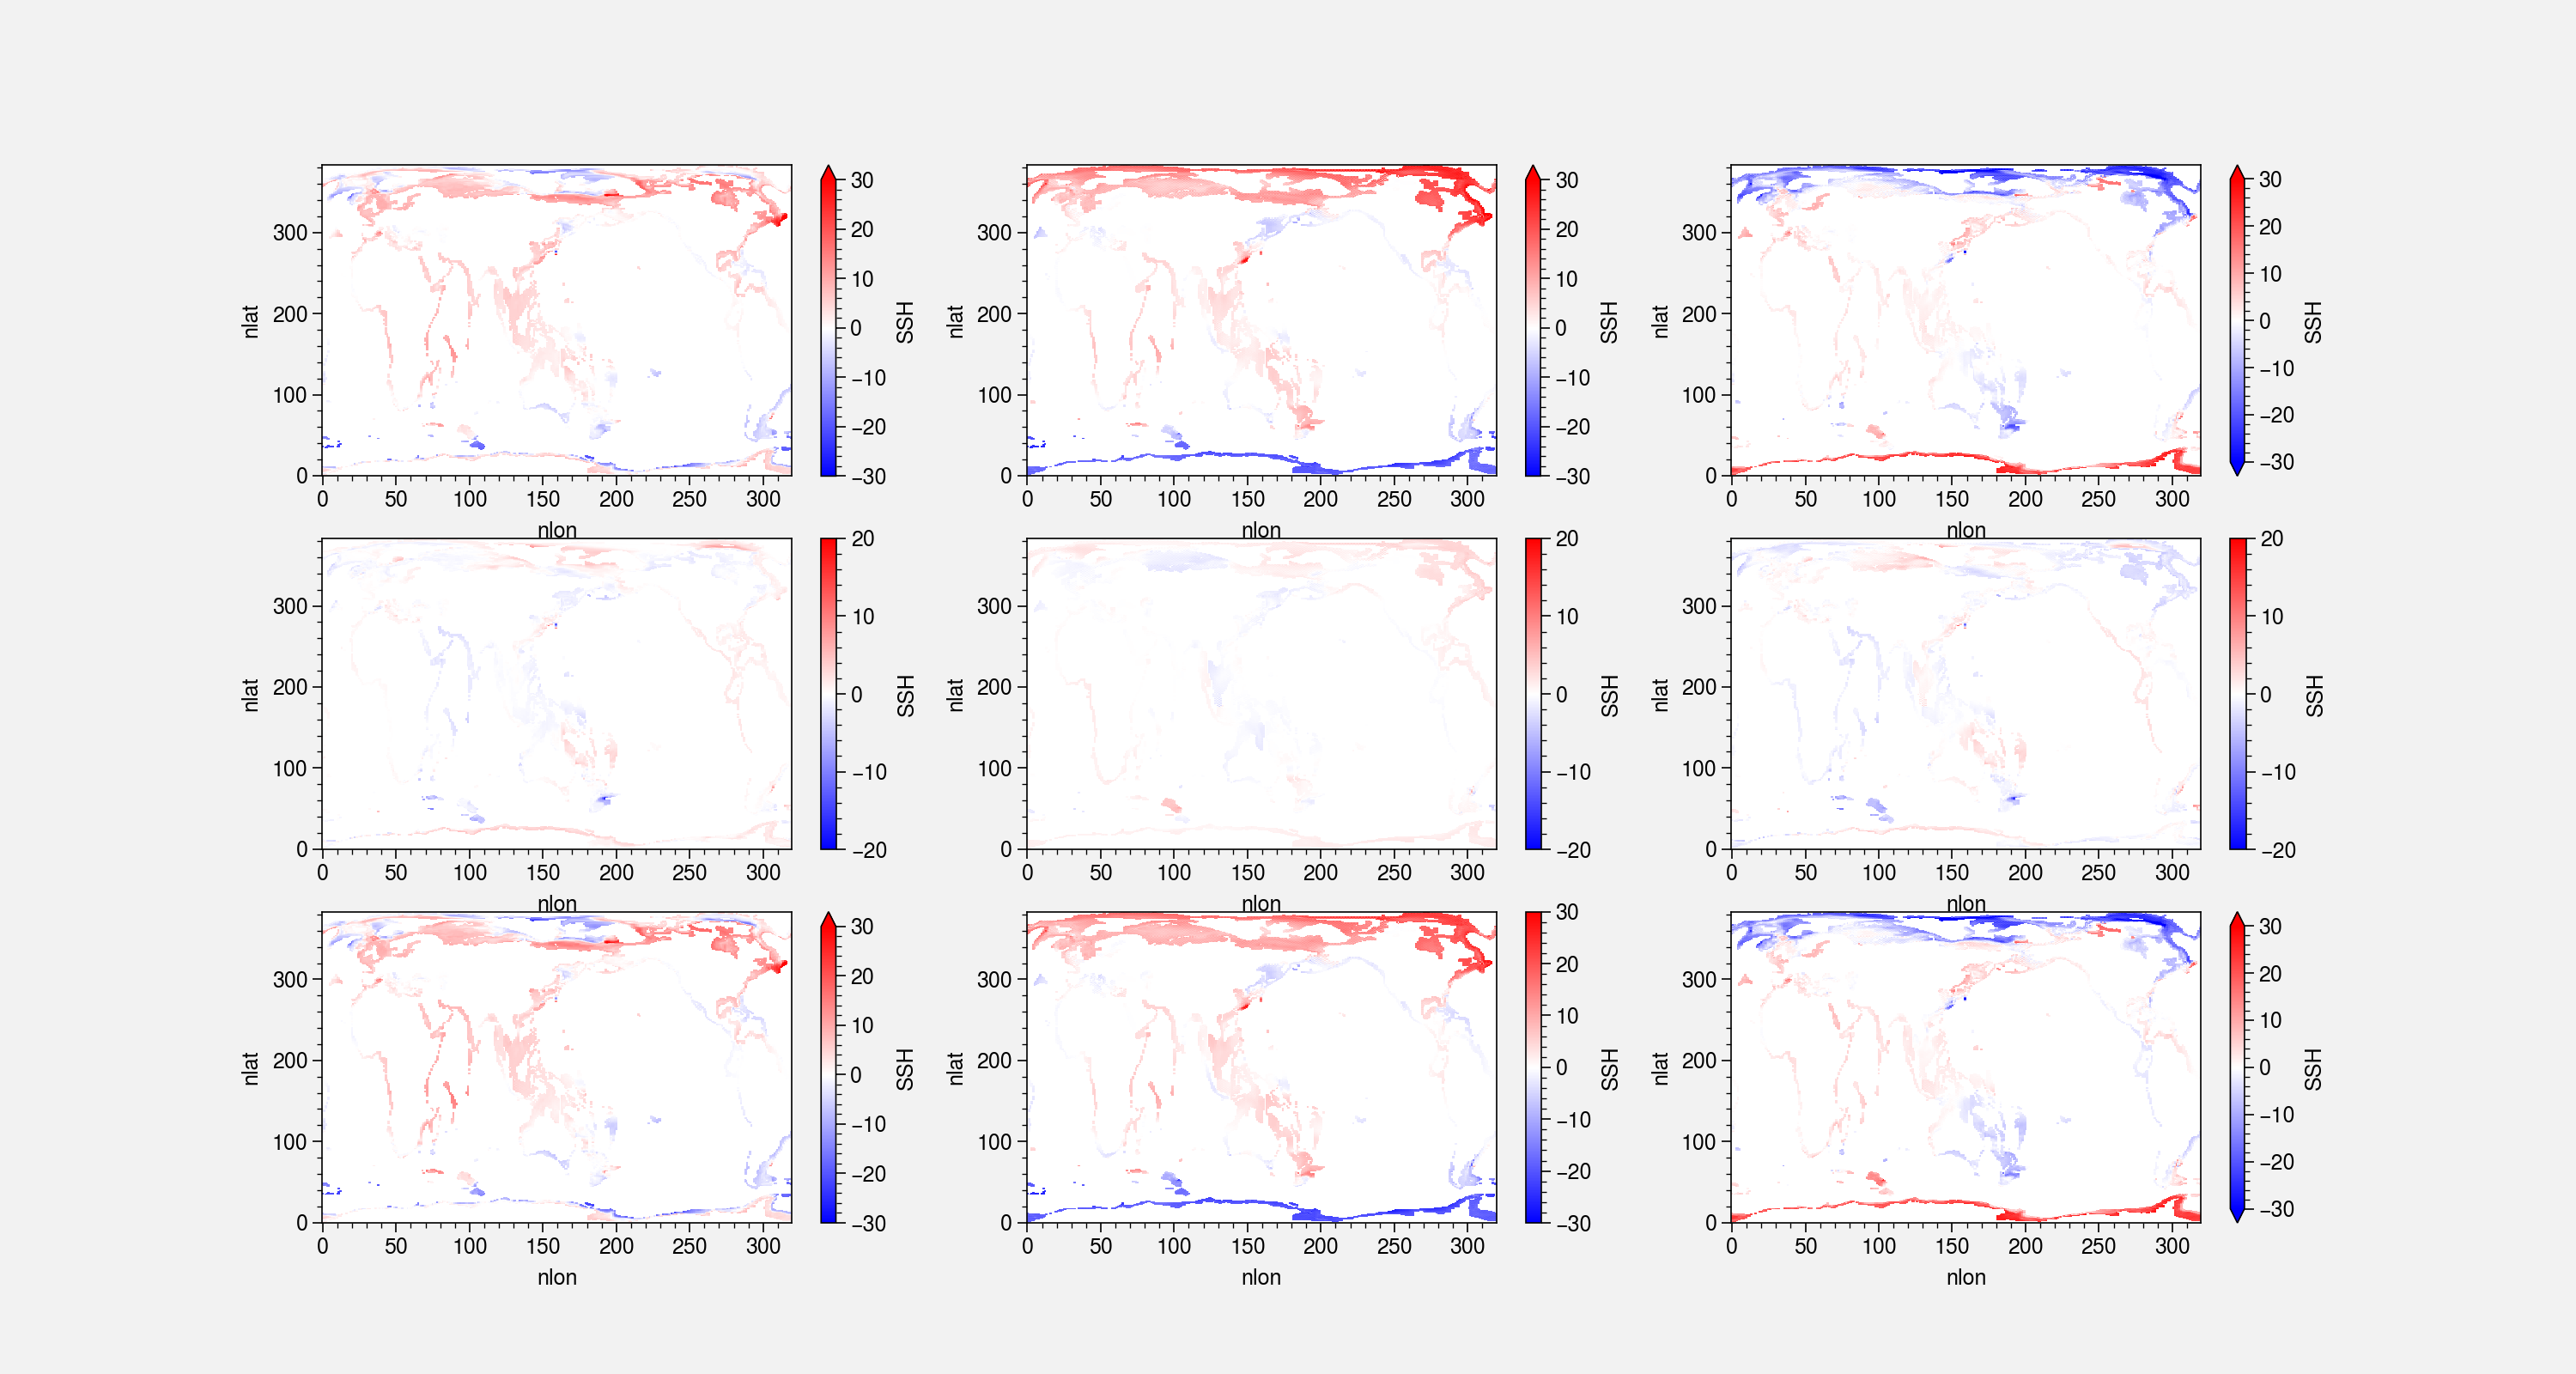

In [17]:
fig, axes = plt.subplots(3,3,figsize=(15,8))
dssh_rgd_TH.where(ds0_g16.KMT<47,np.nan).plot(ax=axes[0,0],vmin=-30,vmax=30,cmap='bwr')
dssh_TL.where(ds0_g16.KMT<47,np.nan).plot(ax=axes[0,1],vmin=-30,vmax=30,cmap='bwr')
(dssh_rgd_TH-dssh_TL).where(ds0_g16.KMT<47,np.nan).plot(ax=axes[0,2],vmin=-30,vmax=30,cmap='bwr')

dssh_rgd_CH.where(ds0_g16.KMT<47,np.nan).plot(ax=axes[1,0],vmin=-20,vmax=20,cmap='bwr')
dssh_CL.where(ds0_g16.KMT<47,np.nan).plot(ax=axes[1,1],vmin=-20,vmax=20,cmap='bwr')
(dssh_rgd_CH-dssh_CL).where(ds0_g16.KMT<47,np.nan).plot(ax=axes[1,2],vmin=-20,vmax=20,cmap='bwr')

(dssh_rgd_TH-dssh_rgd_CH).where(ds0_g16.KMT<47,np.nan).plot(ax=axes[2,0],vmin=-30,vmax=30,cmap='bwr')
(dssh_TL-dssh_CL).where(ds0_g16.KMT<47,np.nan).plot(ax=axes[2,1],vmin=-30,vmax=30,cmap='bwr')
((dssh_rgd_TH-dssh_rgd_CH)-(dssh_TL-dssh_CL)).where(ds0_g16.KMT<47,np.nan).plot(ax=axes[2,2],vmin=-30,vmax=30,cmap='bwr')

# make pics 
add cylic for POP before plotting

In [18]:
def pop_add_cyclic(ds):
    '''readme: copied by DL on 2021Apr13 from Matt Long github 
    https://gist.github.com/matt-long/50433da346da8ac17cde926eec90a87c'''
    nj = ds.TLAT.shape[0]
    ni = ds.TLONG.shape[1]

    xL = int(ni/2 - 1)
    xR = int(xL + ni)

    tlon = ds.TLONG.data
    tlat = ds.TLAT.data
    
    tlon = np.where(np.greater_equal(tlon, min(tlon[:,0])), tlon-360., tlon)    
    lon  = np.concatenate((tlon, tlon + 360.), 1)
    lon = lon[:, xL:xR]

    if ni == 320:
        lon[367:-3, 0] = lon[367:-3, 0] + 360.        
    lon = lon - 360.
    
    lon = np.hstack((lon, lon[:, 0:1] + 360.))
    if ni == 320:
        lon[367:, -1] = lon[367:, -1] - 360.

    #-- trick cartopy into doing the right thing:
    #   it gets confused when the cyclic coords are identical
    lon[:, 0] = lon[:, 0] - 1e-8

    #-- periodicity
    lat = np.concatenate((tlat, tlat), 1)
    lat = lat[:, xL:xR]
    lat = np.hstack((lat, lat[:,0:1]))

    TLAT = xr.DataArray(lat, dims=('nlat', 'nlon'))
    TLONG = xr.DataArray(lon, dims=('nlat', 'nlon'))
    
    dso = xr.Dataset({'TLAT': TLAT, 'TLONG': TLONG})

    # copy vars
    varlist = [v for v in ds.data_vars if v not in ['TLAT', 'TLONG']]
    for v in varlist:
        v_dims = ds[v].dims
        if not ('nlat' in v_dims and 'nlon' in v_dims):
            dso[v] = ds[v]
        else:
            # determine and sort other dimensions
            other_dims = set(v_dims) - {'nlat', 'nlon'}
            other_dims = tuple([d for d in v_dims if d in other_dims])
            lon_dim = ds[v].dims.index('nlon')
            field = ds[v].data
            field = np.concatenate((field, field), lon_dim)
            field = field[..., :, xL:xR]
            field = np.concatenate((field, field[..., :, 0:1]), lon_dim)       
            dso[v] = xr.DataArray(field, dims=other_dims+('nlat', 'nlon'), 
                                  attrs=ds[v].attrs)


    # copy coords
    for v, da in ds.coords.items():
        if not ('nlat' in da.dims and 'nlon' in da.dims):
            dso = dso.assign_coords(**{v: da})
                
            
    return dso

In [19]:
ds0_g16['dssh_rgd_TH'] = dssh_rgd_TH
ds0_g16['dssh_TL'] = dssh_TL
ds0_g16['dssh_rgd_CH'] = dssh_rgd_CH
ds0_g16['dssh_CL'] = dssh_CL
ds0_g16['HT_TL'] = ds0_TL.HT.drop('ULONG').drop('ULAT')
ds0_g16_ac = pop_add_cyclic(ds0_g16) # ac: add cyclic
ds0_g16_ac

<xarray.Dataset>
Dimensions:      (nlat: 384, nlon: 321, z_t: 60, z_w: 60, z_w_bot: 60)
Coordinates:
  * z_t          (z_t) float64 500.0 1.5e+03 2.5e+03 ... 5.125e+05 5.375e+05
  * z_w          (z_w) float64 0.0 1e+03 2e+03 3e+03 ... 4.75e+05 5e+05 5.25e+05
  * z_w_bot      (z_w_bot) float64 1e+03 2e+03 3e+03 ... 5e+05 5.25e+05 5.5e+05
Dimensions without coordinates: nlat, nlon
Data variables: (12/15)
    TLAT         (nlat, nlon) float64 -79.22 -79.22 -79.22 ... 80.31 80.31 80.31
    TLONG        (nlat, nlon) float64 -220.6 -219.4 -218.3 ... -39.57 -39.86
    ULAT         (nlat, nlon) float64 -78.95 -78.95 -78.95 ... 80.03 80.03 80.03
    ULONG        (nlat, nlon) float64 140.0 141.1 142.3 ... 320.5 320.3 320.0
    DXT          (nlat, nlon) float64 2.339e+06 2.339e+06 ... 5.335e+05
    DYT          (nlat, nlon) float64 5.94e+06 5.94e+06 ... 6.263e+06 6.263e+06
    ...           ...
    dz           (z_t) float64 ...
    dssh_rgd_TH  (nlat, nlon) float64 nan nan nan nan nan ... nan nan nan nan
    dssh_TL      (nlat, nlon) float32 dask.array<chunksize=(384, 161), meta=np.ndarray>
    dssh_rgd_CH  (nlat, nlon) float64 nan nan nan nan nan ... nan nan nan nan
    dssh_CL      (nlat, nlon) float32 dask.array<chunksize=(384, 161), meta=np.ndarray>
    HT_TL        (nlat, nlon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0

/scratch/group/ihesp/shared/conda/envs/envMar25/lib/python3.7/site-packages/proplot/figure.py:1158: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  return super().colorbar(*args, cax=cax, **kwargs)
/scratch/group/ihesp/shared/conda/envs/envMar25/lib/python3.7/site-packages/proplot/figure.py:1158: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  return super().colorbar(*args, cax=cax, **kwargs)
/scratch/group/ihesp/shared/conda/envs/envMar25/lib/python3.7/site-packages/proplot/figure.py:1158: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  return super

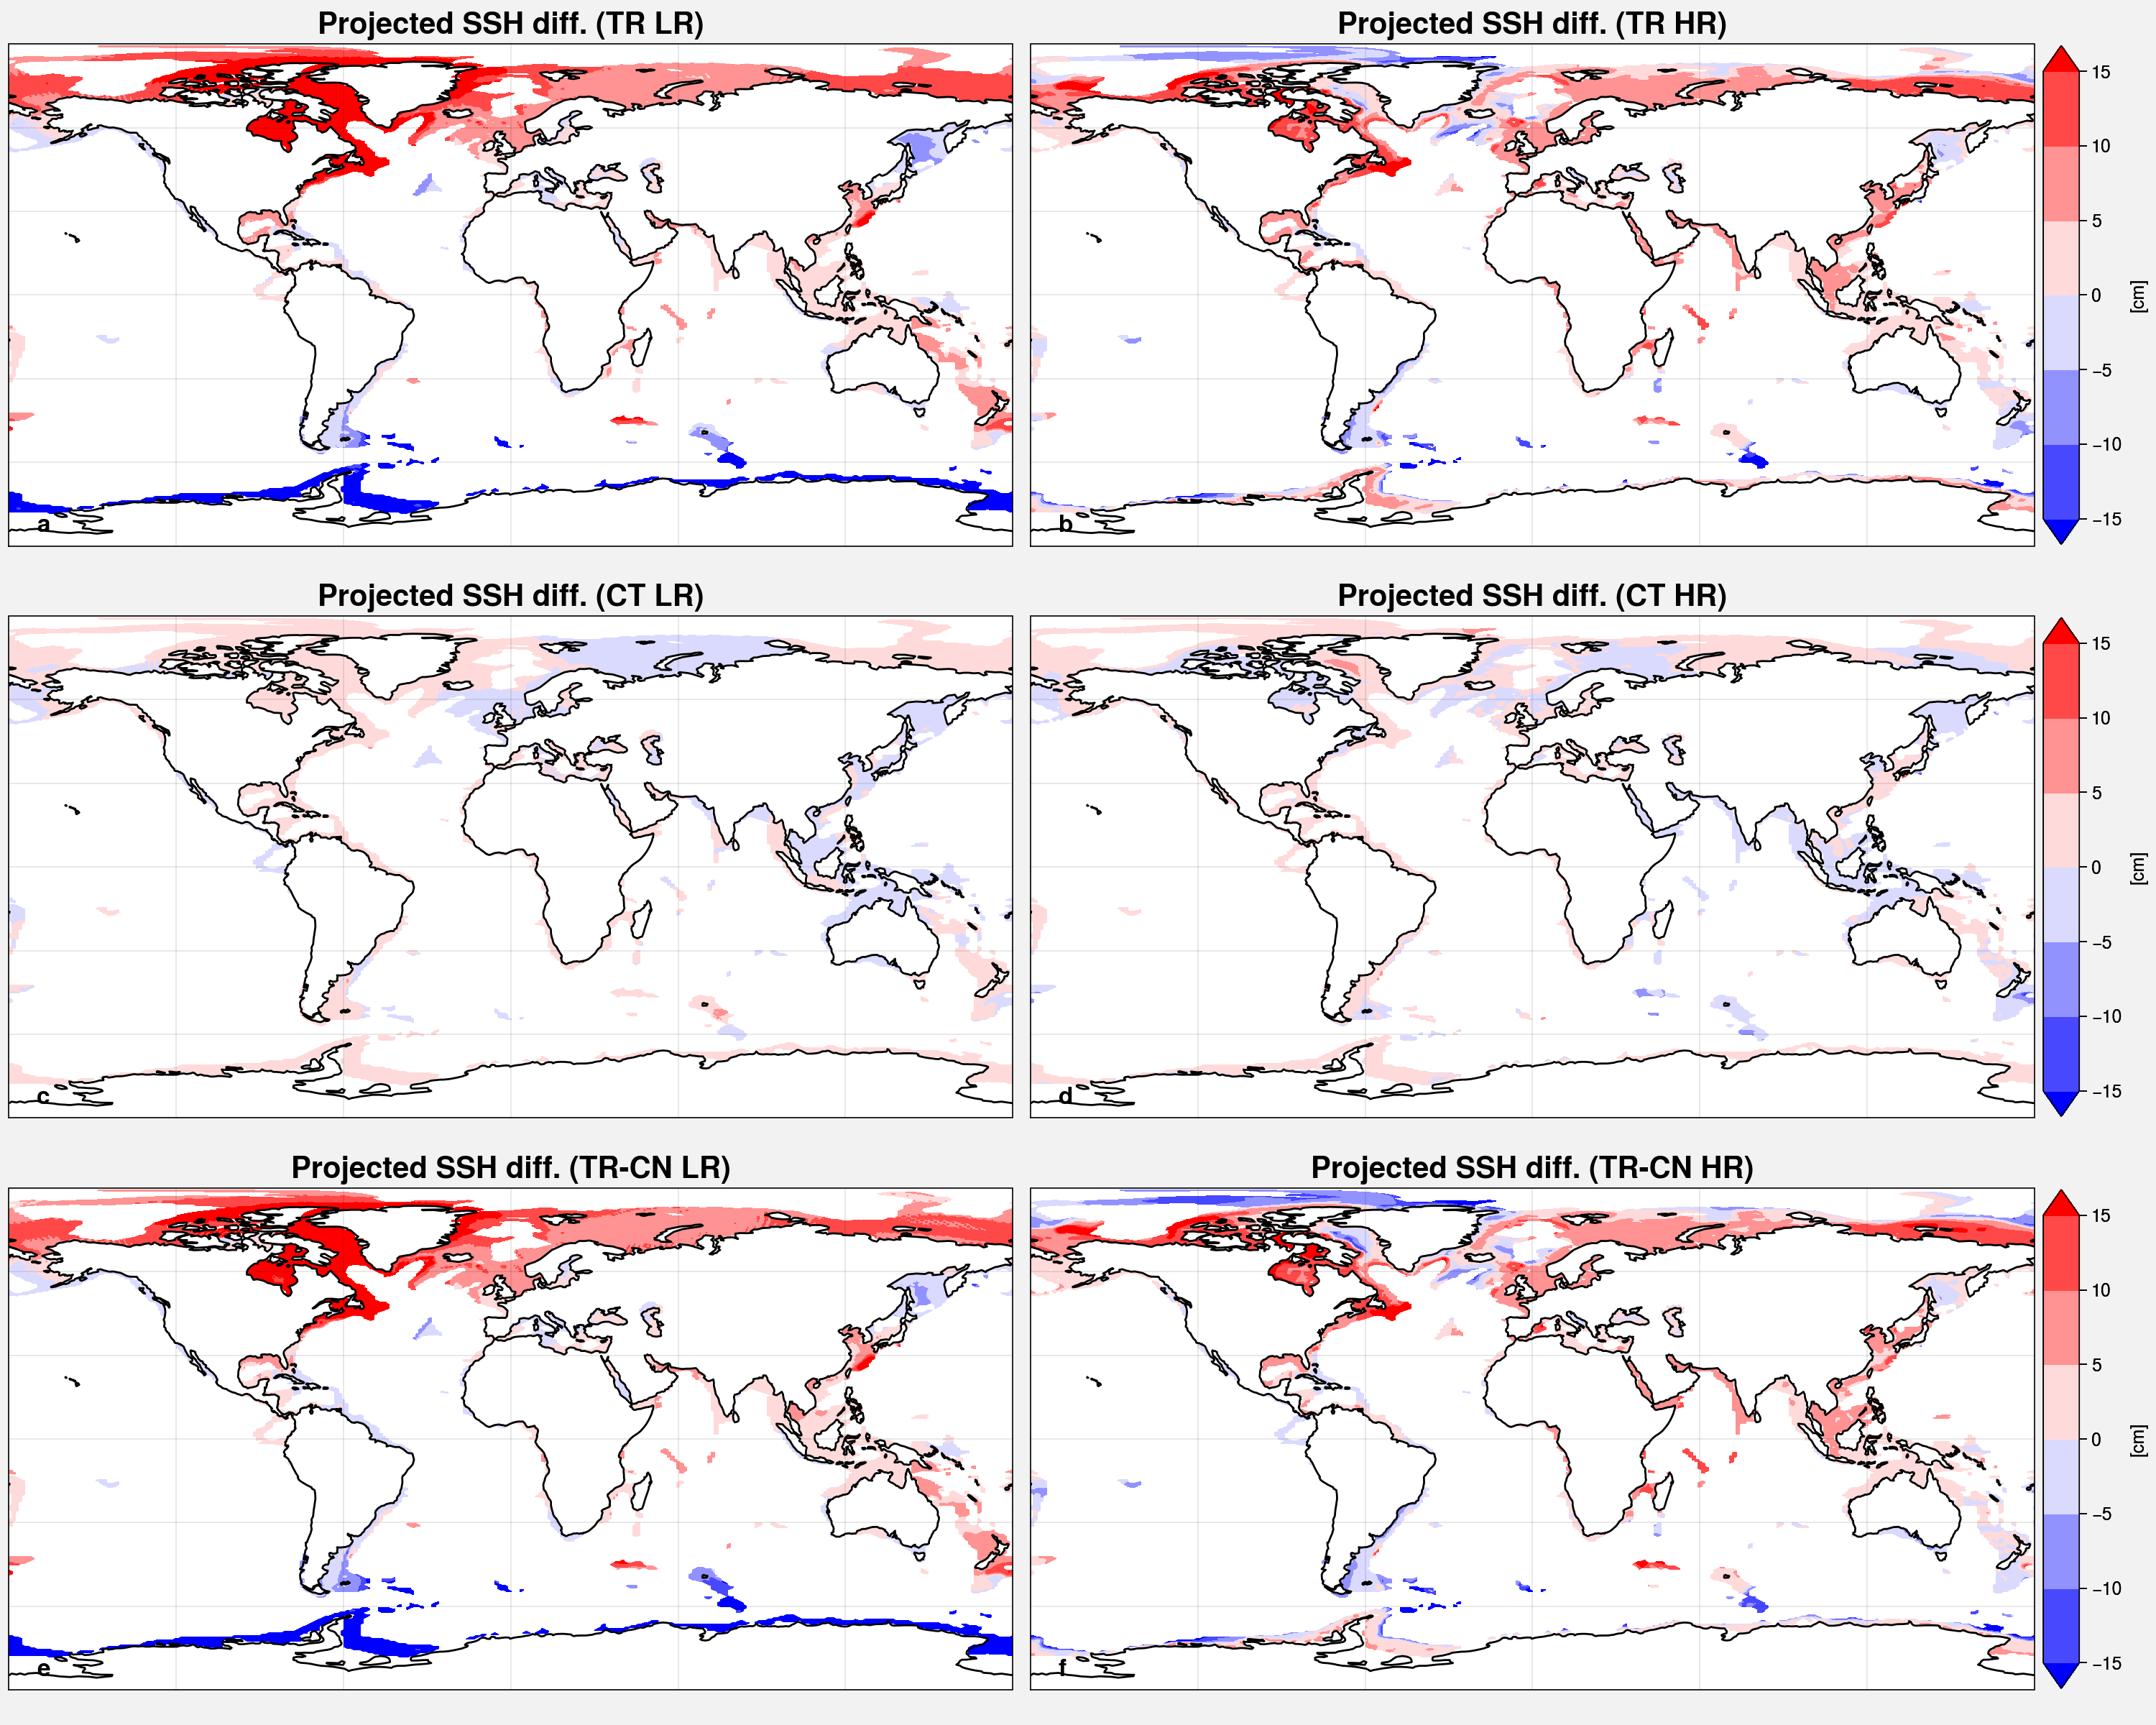

In [20]:
pc = cartopy.crs.PlateCarree()

fig1, axs = plot.subplots(nrows=3,ncols=2,proj='cyl',width='15in',height='12in')

axs[0,0].contourf(ds0_g16_ac.TLONG, ds0_g16_ac.TLAT, 
    ds0_g16_ac.dssh_TL.where(ds0_g16_ac.HT_TL<2.5e5,np.nan), transform=pc, 
    vmin=-15, vmax=15, levels=np.arange(-15,15+1,5),extend='both',cmap='bwr')
axs[0,0].coastlines(resolution='110m', color='black', linewidth=1)
axs[0,0].set_title('Projected SSH diff. (TR LR)',fontsize=15, fontweight='bold')
axs[0,0].text(-170, -85, 'a', transform=pc, fontsize=12, fontweight='bold')

m1=axs[0,1].contourf(ds0_g16_ac.TLONG, ds0_g16_ac.TLAT, 
    ds0_g16_ac.dssh_rgd_TH.where(ds0_g16_ac.HT_TL<2.5e5,np.nan), transform=pc, 
    vmin=-15, vmax=15, levels=np.arange(-15,15+1,5), extend='both', cmap='bwr')
axs[0,1].coastlines(resolution='110m', color='black', linewidth=1)
axs[0,1].set_title('Projected SSH diff. (TR HR)',fontsize=15, fontweight='bold')
axs[0,1].text(-170, -85, 'b', transform=pc, fontsize=12, fontweight='bold')
cb = axs[0,1].colorbar(m1,loc='r', label='[cm]',width='2em',shrink=0.9)

axs[1,0].contourf(ds0_g16_ac.TLONG, ds0_g16_ac.TLAT, 
    ds0_g16_ac.dssh_CL.where(ds0_g16_ac.HT_TL<2.5e5,np.nan), transform=pc, 
    vmin=-15, vmax=15, levels=np.arange(-15,15+1,5),extend='both',cmap='bwr')
axs[1,0].coastlines(resolution='110m', color='black', linewidth=1)
axs[1,0].set_title('Projected SSH diff. (CT LR)',fontsize=15, fontweight='bold')
axs[1,0].text(-170, -85, 'c', transform=pc, fontsize=12, fontweight='bold')

m2=axs[1,1].contourf(ds0_g16_ac.TLONG, ds0_g16_ac.TLAT, 
    ds0_g16_ac.dssh_rgd_CH.where(ds0_g16_ac.HT_TL<2.5e5,np.nan), transform=pc, 
    vmin=-15, vmax=15, levels=np.arange(-15,15+1,5), extend='both', cmap='bwr')
axs[1,1].coastlines(resolution='110m', color='black', linewidth=1)
axs[1,1].set_title('Projected SSH diff. (CT HR)', fontsize=15, fontweight='bold')
axs[1,1].text(-170, -85, 'd', transform=pc, fontsize=12, fontweight='bold')
cb = axs[1,1].colorbar(m2,loc='r', label='[cm]',width='2em',shrink=0.9)

axs[2,0].contourf(ds0_g16_ac.TLONG, ds0_g16_ac.TLAT, 
    (ds0_g16_ac.dssh_TL-ds0_g16_ac.dssh_CL).where(ds0_g16_ac.HT_TL<2.5e5,np.nan), 
    transform=pc, vmin=-15, vmax=15, levels=np.arange(-15,15+1,5),extend='both',cmap='bwr')
axs[2,0].coastlines(resolution='110m', color='black', linewidth=1)
axs[2,0].set_title('Projected SSH diff. (TR-CN LR)',fontsize=15, fontweight='bold')
axs[2,0].text(-170, -85, 'e', transform=pc,fontsize=12,fontweight='bold')

m3=axs[2,1].contourf(ds0_g16_ac.TLONG, ds0_g16_ac.TLAT, 
    (ds0_g16_ac.dssh_rgd_TH-ds0_g16_ac.dssh_rgd_CH).where(ds0_g16_ac.HT_TL<2.5e5,np.nan), 
    transform=pc, vmin=-15, vmax=15, levels=np.arange(-15,15+1,5),extend='both',cmap='bwr')
axs[2,1].coastlines(resolution='110m', color='black', linewidth=1)
axs[2,1].set_title('Projected SSH diff. (TR-CN HR)',fontsize=15, fontweight='bold')
axs[2,1].text(-170, -85, 'f', transform=pc, fontsize=12, fontweight='bold')
cb = axs[2,1].colorbar(m3,loc='r', label='[cm]',width='2em',shrink=0.9)

fig1.savefig(pic1, bbox_inches='tight')

/scratch/group/ihesp/shared/conda/envs/envMar25/lib/python3.7/site-packages/proplot/figure.py:1158: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  return super().colorbar(*args, cax=cax, **kwargs)
/scratch/group/ihesp/shared/conda/envs/envMar25/lib/python3.7/site-packages/proplot/figure.py:1158: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  return super().colorbar(*args, cax=cax, **kwargs)


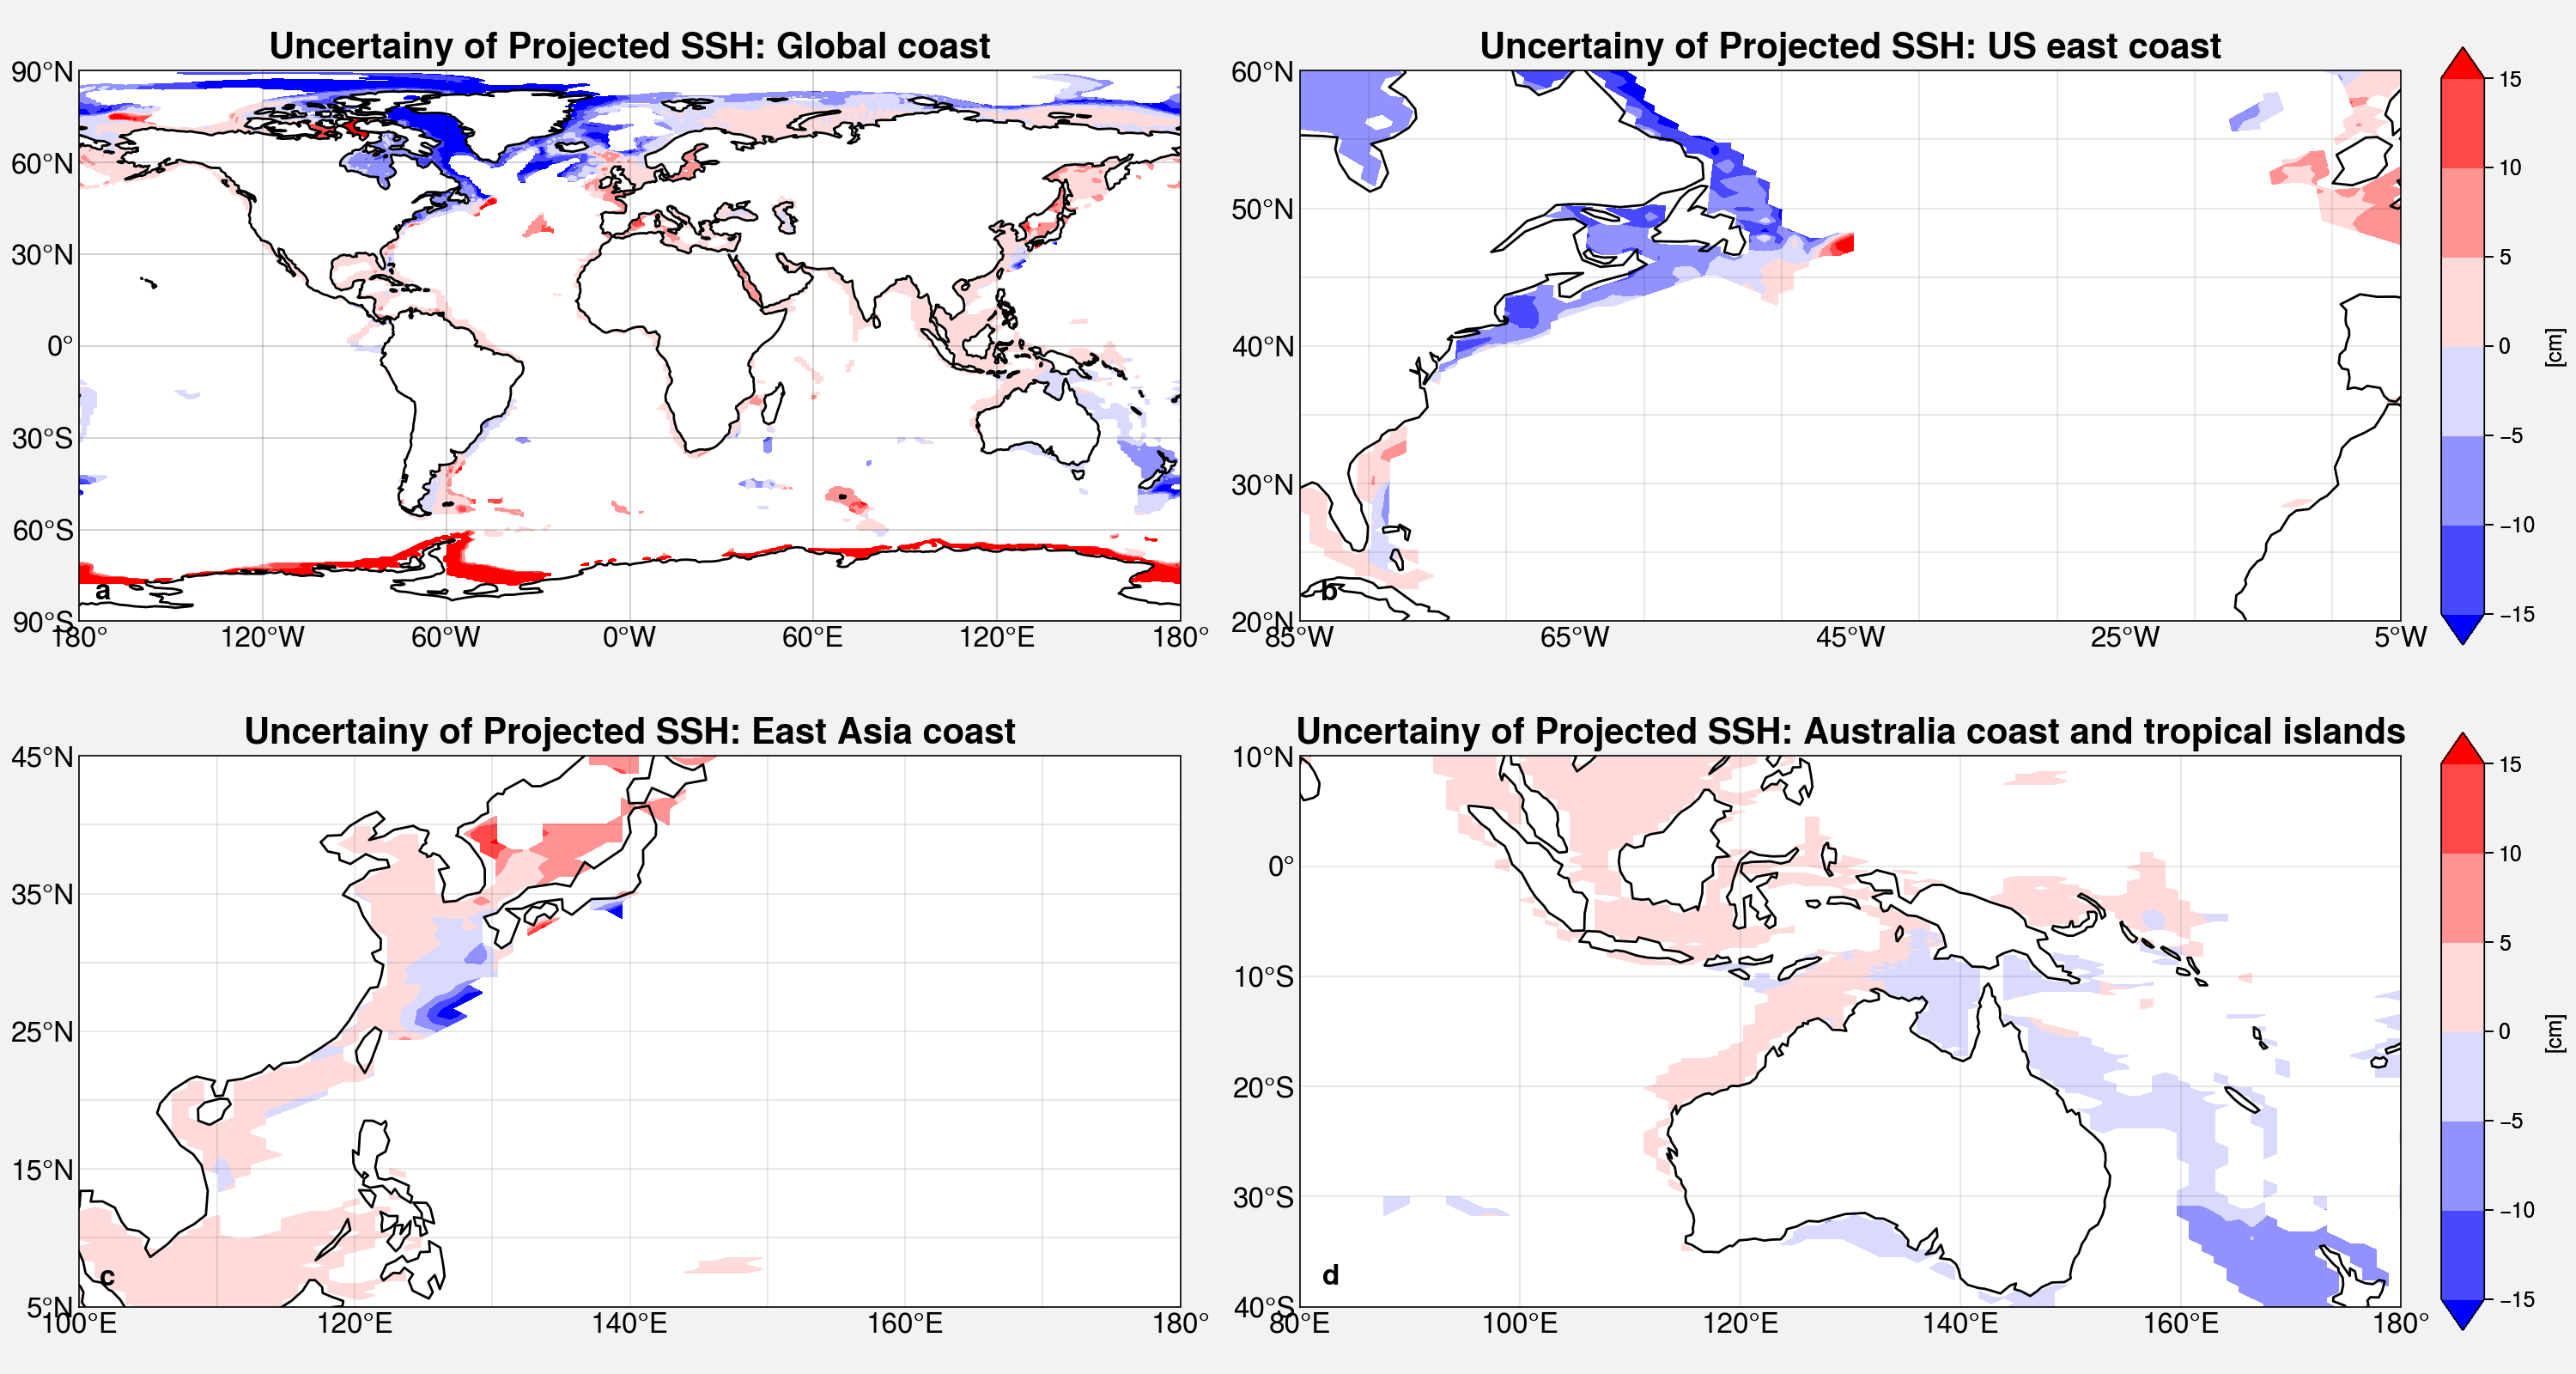

In [21]:
pc = cartopy.crs.PlateCarree()
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()

fig2, axs = plot.subplots(nrows=2,ncols=2,proj='cyl',width='15in',height='8in')
# axs.format(fontsize=25) # axs.format(grid=False)

axs[0,0].contourf(ds0_g16_ac.TLONG, ds0_g16_ac.TLAT, 
    (ds0_g16_ac.dssh_rgd_TH-ds0_g16_ac.dssh_TL).where(ds0_g16_ac.HT_TL<2.5e5,np.nan), 
    transform=pc,vmin=-15, vmax=15, levels=np.arange(-15,15+1,5),extend='both',cmap='bwr')
axs[0,0].coastlines(resolution='110m', color='black', linewidth=1)
axs[0,0].set_xticks(np.arange(-180,180+1,60), crs=pc)
axs[0,0].set_xticklabels(np.arange(-180,180+1,60), fontsize=12)
axs[0,0].set_yticks(np.arange(-90,90+1,30), crs=pc)
axs[0,0].set_yticklabels(np.arange(-90,90+1,30), fontsize=12)
axs[0,0].xaxis.set_major_formatter(lon_formatter)
axs[0,0].yaxis.set_major_formatter(lat_formatter)
axs[0,0].set_title('Uncertainy of Projected SSH: Global coast',
                   fontsize=15, fontweight='bold')
axs[0,0].text(-175, -83, 'a', transform=pc,fontsize=12,fontweight='bold')

m1=axs[0,1].contourf(ds0_g16_ac.TLONG, ds0_g16_ac.TLAT, 
    (ds0_g16_ac.dssh_rgd_TH-ds0_g16_ac.dssh_TL).where(ds0_g16_ac.HT_TL<1.0e5,np.nan),
    transform=pc, vmin=-15, vmax=15, levels=np.arange(-15,15+1,5),extend='both',cmap='bwr')
axs[0,1].coastlines(resolution='110m', color='black', linewidth=1)
axs[0,1].set_extent([-85, -5, 20, 60], crs=pc)
axs[0,1].set_xticks(np.arange(-85,-5+1,20), crs=pc)
axs[0,1].set_xticklabels(np.arange(-85,-5+1,20), fontsize=12)
axs[0,1].set_yticks(np.arange(20,60+1,10), crs=pc)
axs[0,1].set_yticklabels(np.arange(20,60+1,10), fontsize=12)
axs[0,1].xaxis.set_major_formatter(lon_formatter)
axs[0,1].yaxis.set_major_formatter(lat_formatter)
axs[0,1].set_title('Uncertainy of Projected SSH: US east coast',
                   fontsize=15, fontweight='bold')
axs[0,1].text(-83.5, 21.5, 'b', transform=pc, fontsize=12, fontweight='bold')
cb = axs[0,1].colorbar(m1,loc='r', label='[cm]', width='2em', shrink=0.9)

axs[1,0].contourf(ds0_g16_ac.TLONG, ds0_g16_ac.TLAT, 
    (ds0_g16_ac.dssh_rgd_TH-ds0_g16_ac.dssh_TL).where(ds0_g16_ac.HT_TL<2.5e5,np.nan),
    transform=pc, vmin=-15, vmax=15, levels=np.arange(-15,15+1,5),extend='both',cmap='bwr')
axs[1,0].coastlines(resolution='110m', color='black', linewidth=1)
axs[1,0].set_extent([100, 180, 5, 45], crs=pc)
axs[1,0].set_xticks(np.arange(100, 180+1,20), crs=pc)
axs[1,0].set_xticklabels(np.arange(100, 180+1,20), fontsize=12)
axs[1,0].set_yticks(np.arange(5, 45+1,10), crs=pc)
axs[1,0].set_yticklabels(np.arange(5, 45+1,10), fontsize=12)
axs[1,0].xaxis.set_major_formatter(lon_formatter)
axs[1,0].yaxis.set_major_formatter(lat_formatter)
axs[1,0].set_title('Uncertainy of Projected SSH: East Asia coast',
                   fontsize=15, fontweight='bold')
axs[1,0].text(101.5, 6.5, 'c', transform=pc, fontsize=12, fontweight='bold')

m2 = axs[1,1].contourf(ds0_g16_ac.TLONG, ds0_g16_ac.TLAT, 
    (ds0_g16_ac.dssh_rgd_TH-ds0_g16_ac.dssh_TL).where(ds0_g16_ac.HT_TL<2.5e5,np.nan), 
    transform=pc, vmin=-15, vmax=15, levels=np.arange(-15,15+1,5),extend='both',cmap='bwr')
axs[1,1].coastlines(resolution='110m', color='black', linewidth=1)
axs[1,1].set_extent([80, 180, -40, 10], crs=pc)
axs[1,1].set_xticks(np.arange(80, 180+1,20), crs=pc)
axs[1,1].set_xticklabels(np.arange(80, 180+1,20), fontsize=12)
axs[1,1].set_yticks(np.arange(-40, 10+1,10), crs=pc)
axs[1,1].set_yticklabels(np.arange(-40, 10+1,10), fontsize=12)
axs[1,1].xaxis.set_major_formatter(lon_formatter)
axs[1,1].yaxis.set_major_formatter(lat_formatter)
axs[1,1].set_title('Uncertainy of Projected SSH: Australia coast and tropical islands',
                   fontsize=15, fontweight='bold')
axs[1,1].text(82, -38, 'd', transform=pc, fontsize=12, fontweight='bold')
cb = axs[1,1].colorbar(m2,loc='r', label='[cm]', width='2em', shrink=0.9)

fig2.savefig(pic2,bbox_inches='tight')